In [113]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup  # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [114]:
url = "http://www.laughfactory.com/jokes/family-jokes"
r = requests.get(url)
htmlcontent = r._content

#step 2 parsing content

soup = BeautifulSoup(htmlcontent, 'html.parser')

jokes = []

metatags = soup.find_all('div',attrs={'class':'jokes'})
for tag in metatags:
    jokes.append(tag.find("p").get_text())

In [115]:
jokes

['\r\n                        A child asked his father, "How were people born?" So his father said, "Adam and Eve made babies, then their babies became adults and made babies, and so on." The child then went to his mother, asked her the same question and she told him, "We were monkeys then we evolved to become like we are now." The child ran back to his father and said, "You lied to me!" His father replied, "No, your mom was talking about her side of the family."                    ',
 '\r\n                        Mr. and Mrs. Brown had two sons. One was named Mind Your Own Business & the other was named Trouble. One day the two boys decided to play hide and seek. Trouble hid while Mind Your Own Business counted to one hundred. Mind Your Own Business began looking for his brother behind garbage cans and bushes. Then he started looking in and under cars until a police man approached him and asked, "What are you doing?" "Playing a game," the boy replied. "What is your name?" the officer 

In [116]:
# writng reviews in a text file 
with open("website-jokes.txt","w",encoding='utf8') as output:
    output.write(str(jokes))

In [117]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(jokes)


In [118]:
import nltk
# from nltk.corpus import stopwords|

In [119]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [120]:

ip_reviews_words = ip_rev_string.split(" ")
ip_reviews_words

['',
 'a',
 'child',
 'asked',
 'his',
 'father',
 'how',
 'were',
 'people',
 'born',
 'so',
 'his',
 'father',
 'said',
 'adam',
 'and',
 'eve',
 'made',
 'babies',
 'then',
 'their',
 'babies',
 'became',
 'adults',
 'and',
 'made',
 'babies',
 'and',
 'so',
 'on',
 'the',
 'child',
 'then',
 'went',
 'to',
 'his',
 'mother',
 'asked',
 'her',
 'the',
 'same',
 'question',
 'and',
 'she',
 'told',
 'him',
 'we',
 'were',
 'monkeys',
 'then',
 'we',
 'evolved',
 'to',
 'become',
 'like',
 'we',
 'are',
 'now',
 'the',
 'child',
 'ran',
 'back',
 'to',
 'his',
 'father',
 'and',
 'said',
 'you',
 'lied',
 'to',
 'me',
 'his',
 'father',
 'replied',
 'no',
 'your',
 'mom',
 'was',
 'talking',
 'about',
 'her',
 'side',
 'of',
 'the',
 'family',
 'mr',
 'and',
 'mrs',
 'brown',
 'had',
 'two',
 'sons',
 'one',
 'was',
 'named',
 'mind',
 'your',
 'own',
 'business',
 'the',
 'other',
 'was',
 'named',
 'trouble',
 'one',
 'day',
 'the',
 'two',
 'boys',
 'decided',
 'to',
 'play',
 'hid

In [121]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1, 3))
X = vectorizer.fit_transform(ip_reviews_words)

In [122]:
with open("stopwords.txt","r") as sw:
    stop_words = sw.read()

In [123]:
stop_words = stop_words.split("\n")

stop_words.extend(["jokes"])


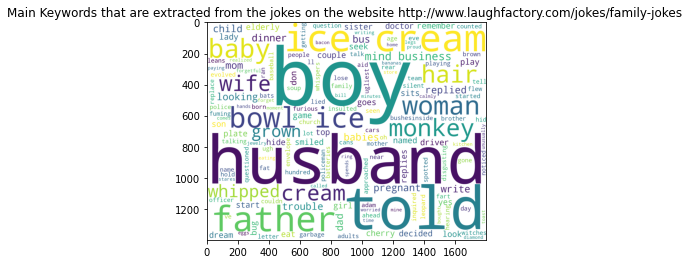

In [124]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)
plt.title("Main Keywords that are extracted from the jokes on the website http://www.laughfactory.com/jokes/family-jokes ")
plt.show()

In [125]:
# WordCloud can be performed on the string inputs.
# Corpus level word cloud
# positive words # Choose the path for +ve words stored in system
with open(r"positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

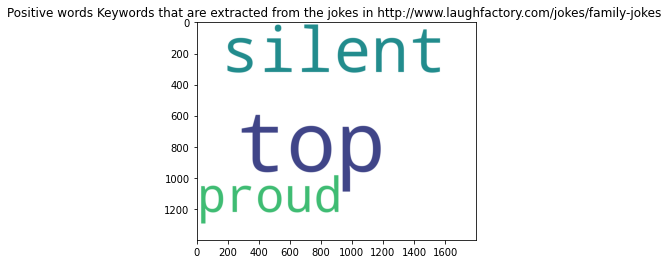

In [126]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.title("Positive words Keywords that are extracted from the jokes in http://www.laughfactory.com/jokes/family-jokes ")
plt.imshow(wordcloud_pos_in_pos)
plt.show()

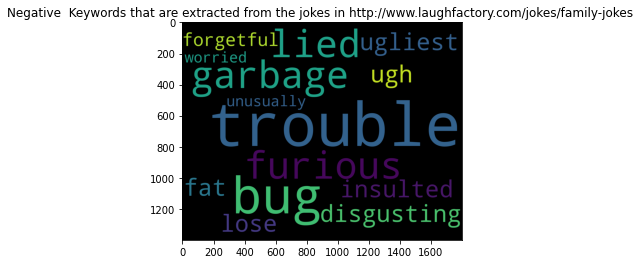

In [127]:
# negative words Choose path for -ve words stored in system
with open(r"negative-words.txt", "r") as neg:
  negwords = neg.read().split("\n")

# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.title("Negative  Keywords that are extracted from the jokes in http://www.laughfactory.com/jokes/family-jokes ")
plt.imshow(wordcloud_neg_in_neg)
plt.show()

# **Word cloud with Bigram**

In [128]:
# wordcloud with bigram
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [129]:
WNL = nltk.WordNetLemmatizer() # it groups up similar word i.e words with similar meaning

# Lowercase and tokenize
text = ip_rev_string.lower()

# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")

In [130]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]
text_content

['child',
 'father',
 'people',
 'born',
 'father',
 'adam',
 'eve',
 'babies',
 'babies',
 'adults',
 'babies',
 'child',
 'mother',
 'question',
 'told',
 'monkeys',
 'evolved',
 'child',
 'ran',
 'father',
 'lied',
 'father',
 'replied',
 'mom',
 'talking',
 'family',
 'brown',
 'sons',
 'named',
 'mind',
 'own',
 'business',
 'named',
 'trouble',
 'day',
 'boys',
 'decided',
 'play',
 'hide',
 'seek',
 'trouble',
 'hid',
 'mind',
 'own',
 'business',
 'counted',
 'hundred',
 'mind',
 'own',
 'business',
 'looking',
 'brother',
 'garbage',
 'cans',
 'bushes',
 'started',
 'looking',
 'cars',
 'police',
 'approached',
 'doing',
 'playing',
 'game',
 'boy',
 'replied',
 'name',
 'officer',
 'questioned',
 'mind',
 'own',
 'business',
 'furious',
 'policeman',
 'inquired',
 'looking',
 'trouble',
 'boy',
 'replied',
 'yes',
 'boy',
 'father',
 'dad',
 'bugs',
 'eat',
 'disgusting',
 'don',
 'talk',
 'dinner',
 'dad',
 'replies',
 'dinner',
 'father',
 'son',
 'oh',
 'boy',
 'bug',
 'so

In [131]:
# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['price', 'great'] # If you want to remove any particular word form text which does not contribute much in meaning


In [132]:
new_stopwords = stopwords_wc.union(customised_words)
# Remove stop words
text_content = [word for word in text_content if word not in new_stopwords]

# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]

In [133]:
# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

In [134]:
nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('child', 'father'), ('father', 'people'), ('people', 'born'), ('born', 'father'), ('father', 'adam'), ('adam', 'eve'), ('eve', 'baby'), ('baby', 'baby'), ('baby', 'adult'), ('adult', 'baby'), ('baby', 'child'), ('child', 'mother'), ('mother', 'question'), ('question', 'told'), ('told', 'monkey'), ('monkey', 'evolved'), ('evolved', 'child'), ('child', 'ran'), ('ran', 'father'), ('father', 'lied'), ('lied', 'father'), ('father', 'replied'), ('replied', 'mom'), ('mom', 'talking'), ('talking', 'family'), ('family', 'brown'), ('brown', 'son'), ('son', 'named'), ('named', 'mind'), ('mind', 'business'), ('business', 'named'), ('named', 'trouble'), ('trouble', 'day'), ('day', 'boy'), ('boy', 'decided'), ('decided', 'play'), ('play', 'hide'), ('hide', 'seek'), ('seek', 'trouble'), ('trouble', 'hid'), ('hid', 'mind'), ('mind', 'business'), ('business', 'counted'), ('counted', 'hundred'), ('hundred', 'mind'), ('mind', 'business'), ('business', 'looking'), ('looking', 'brother'), ('brother', 'ga

In [135]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

['child father', 'father people', 'people born', 'born father', 'father adam', 'adam eve', 'eve baby', 'baby baby', 'baby adult', 'adult baby', 'baby child', 'child mother', 'mother question', 'question told', 'told monkey', 'monkey evolved', 'evolved child', 'child ran', 'ran father', 'father lied', 'lied father', 'father replied', 'replied mom', 'mom talking', 'talking family', 'family brown', 'brown son', 'son named', 'named mind', 'mind business', 'business named', 'named trouble', 'trouble day', 'day boy', 'boy decided', 'decided play', 'play hide', 'hide seek', 'seek trouble', 'trouble hid', 'hid mind', 'mind business', 'business counted', 'counted hundred', 'hundred mind', 'mind business', 'business looking', 'looking brother', 'brother garbage', 'garbage can', 'can bush', 'bush started', 'started looking', 'looking car', 'car police', 'police approached', 'approached playing', 'playing game', 'game boy', 'boy replied', 'replied name', 'name officer', 'officer questioned', 'ques

In [136]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer

In [137]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'adam eve': 0,
 'adult baby': 1,
 'age noticed': 2,
 'ahead ll': 3,
 'aid boy': 4,
 'approached playing': 5,
 'baby adult': 6,
 'baby baby': 7,
 'baby boy': 8,
 'baby bus': 9,
 'baby child': 10,
 'baby inside': 11,
 'baby pregnant': 12,
 'baby ve': 13,
 'bacon wife': 14,
 'baseball game': 15,
 'bat flew': 16,
 'battery hearing': 17,
 'bill girl': 18,
 'born father': 19,
 'bought diamond': 20,
 'bowl ice': 21,
 'boy baby': 22,
 'boy bug': 23,
 'boy decided': 24,
 'boy eat': 25,
 'boy father': 26,
 'boy look': 27,
 'boy replied': 28,
 'boy sits': 29,
 'brother garbage': 30,
 'brown son': 31,
 'bug eat': 32,
 'bug soup': 33,
 'bus baby': 34,
 'bus driver': 35,
 'bus sits': 36,
 'bush started': 37,
 'business counted': 38,
 'business furious': 39,
 'business looking': 40,
 'business named': 41,
 'called monkey': 42,
 'calmly hair': 43,
 'can bush': 44,
 'car police': 45,
 'cherry top': 46,
 'child father': 47,
 'child mother': 48,
 'child ran': 49,
 'church wife': 50,
 'come wife': 51,
 '

In [138]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('ice cream', 7), ('bowl ice', 6), ('mind business', 4), ('cream whipped', 4), ('whipped cream', 4), ('pregnant woman', 3), ('told husband', 3), ('husband bowl', 3), ('grown hair', 3), ('play hide', 2), ('hide seek', 2), ('boy replied', 2), ('elderly couple', 2), ('cream write', 2), ('remember bowl', 2), ('write told', 2), ('cream cherry', 2), ('cherry top', 2), ('monkey grown', 2), ('child father', 1), ('father people', 1), ('people born', 1), ('born father', 1), ('father adam', 1), ('adam eve', 1), ('eve baby', 1), ('baby baby', 1), ('baby adult', 1), ('adult baby', 1), ('baby child', 1), ('child mother', 1), ('mother question', 1), ('question told', 1), ('told monkey', 1), ('monkey evolved', 1), ('evolved child', 1), ('child ran', 1), ('ran father', 1), ('father lied', 1), ('lied father', 1), ('father replied', 1), ('replied mom', 1), ('mom talking', 1), ('talking family', 1), ('family brown', 1), ('brown son', 1), ('son named', 1), ('named mind', 1), ('business named', 1), ('named

<Figure size 5040x7200 with 0 Axes>

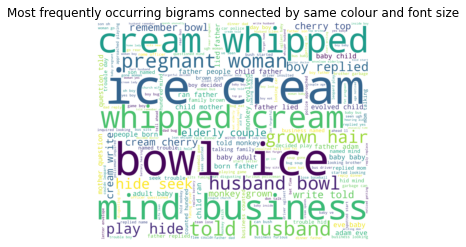

In [139]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 2000
WC_width = 2500
WC_max_words = 200
wordCloud = WordCloud(background_color='white',max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)

plt.figure(figsize= (70,100))
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [140]:
import pandas as pd
df = pd.DataFrame(words_freq, columns = ['Words', 'Ocuurence'])
df

,Words,Ocuurence
0,ice cream,7
1,bowl ice,6
2,mind business,4
3,cream whipped,4
4,whipped cream,4
...,...,...
248,hair sister,1
249,sister smiled,1
250,smiled mine,1
251,mine eating,1


In [141]:
from nltk.corpus import stopwords

In [142]:
# Lemmatization
# Lemmatization looks into dictionary words
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [143]:
lemmatizer = WordNetLemmatizer()
for i in df["Words"]:
    lemmatizer.lemmatize(i)
    

In [144]:
 #Chunking (Shallow Parsing) - Identifying named entities
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [145]:
# Number of words
from textblob import TextBlob

In [146]:
# Detect presence of wh words
wh_words = set(['why', 'who', 'which', 'what', 'where', 'when', 'how'])
df['is_wh_words_present'] = df['Words'].apply(lambda x : True if len(set(TextBlob(str(x)).words).intersection(wh_words))>0 else False)
df['is_wh_words_present']

0      False
1      False
2      False
3      False
4      False
       ...  
248    False
249    False
250    False
251    False
252    False
Name: is_wh_words_present, Length: 253, dtype: bool

In [147]:
# Polarity
df['polarity'] = df['Words'].apply(lambda x : TextBlob(str(x)).sentiment.polarity)
df['polarity']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
248    0.0
249    0.6
250    0.6
251    0.0
252    0.0
Name: polarity, Length: 253, dtype: float64

In [148]:
# Subjectivity
df['subjectivity'] = df['Words'].apply(lambda x : TextBlob(str(x)).sentiment.subjectivity)
df['subjectivity']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
248    0.0
249    0.2
250    0.2
251    0.0
252    0.0
Name: subjectivity, Length: 253, dtype: float64

In [149]:
df.head(5)

,Words,Ocuurence,is_wh_words_present,polarity,subjectivity
0,ice cream,7,False,0.0,0.0
1,bowl ice,6,False,0.0,0.0
2,mind business,4,False,0.0,0.0
3,cream whipped,4,False,0.0,0.0
4,whipped cream,4,False,0.0,0.0


In [150]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['polarity'] != 0]
df['sentiment'] = df['polarity'].apply(lambda rating : +1 if rating > 0 else -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [151]:
df.head(10)

,Words,Ocuurence,is_wh_words_present,polarity,subjectivity,sentiment
5,pregnant woman,3,False,0.333333,0.5,1
17,cherry top,2,False,0.500000,0.5,1
18,monkey grown,2,False,-0.050000,0.0,-1
27,baby adult,1,False,0.100000,0.3,1
28,adult baby,1,False,0.100000,0.3,1
33,told monkey,1,False,-0.050000,0.0,-1
34,monkey evolved,1,False,-0.050000,0.0,-1
49,named trouble,1,False,-0.200000,0.2,-1
50,trouble day,1,False,-0.200000,0.2,-1
54,seek trouble,1,False,-0.200000,0.2,-1


In [152]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [153]:
import plotly.express as px

In [154]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text=' Fast and Furios 9 Movie reviews Sentiment Analysis')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [155]:
df

,Words,Ocuurence,is_wh_words_present,polarity,subjectivity,sentiment,sentimentt
5,pregnant woman,3,False,0.333333,0.50,1,positive
17,cherry top,2,False,0.500000,0.50,1,positive
18,monkey grown,2,False,-0.050000,0.00,-1,negative
27,baby adult,1,False,0.100000,0.30,1,positive
28,adult baby,1,False,0.100000,0.30,1,positive
33,told monkey,1,False,-0.050000,0.00,-1,negative
34,monkey evolved,1,False,-0.050000,0.00,-1,negative
49,named trouble,1,False,-0.200000,0.20,-1,negative
50,trouble day,1,False,-0.200000,0.20,-1,negative
54,seek trouble,1,False,-0.200000,0.20,-1,negative


In [156]:
dfNew = df[['Words','sentiment']]
dfNew.head()

,Words,sentiment
5,pregnant woman,1
17,cherry top,1
18,monkey grown,-1
27,baby adult,1
28,adult baby,1


In [157]:
import numpy as np

In [158]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [159]:
from sklearn.feature_extraction.text import CountVectorizer

In [160]:
# count vectorizer:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Words'])
test_matrix = vectorizer.transform(test['Words'])

In [161]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [162]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [163]:
lr.fit(X_train,y_train)

LogisticRegression()

In [164]:
predictions = lr.predict(X_test)
predictions

array([ 1,  1, -1, -1, -1, -1,  1])

In [165]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[4, 0],
       [0, 3]])

In [166]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



# **Extra Part**

In [167]:
corpus = [ip_rev_string]

bag_of_words_model = CountVectorizer()
print(bag_of_words_model.fit_transform(corpus).todense()) # bag of words

[[ 1  1  1  1  1  1  3  5  1  1  1  1  1  1  1  1  6  8  1  1  1  1  1  3
   1  4  1  1  1  1  2  3  1  1  1  1  2 11  3  1  2  1  3  1  2  1  2  2
   2  2  1  1  2  1  1  1  1  1  1  6  1  1  1  1  1  2  1  1  2  2  1  4
   5  1  1  1  2  1  1  1  8  7  1  1  1  1  1  2  1  1  1  1  1  1  1  3
   1  1  1  4  1  1  3  1  4  1  1  1  2  1  1  1  1  4  1  1  2  2  1  1
   1  3  1  1  1  1  1  1  2  1  3  2  1  2  1  1  2  2  2  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  7  2  3  1  1  1  1  4  1  4  1  5  1
   3  1  2]]


In [168]:
bag_of_word_df = pd.DataFrame(bag_of_words_model.fit_transform(corpus).todense())
bag_of_word_df.columns = sorted(bag_of_words_model.vocabulary_)
bag_of_word_df.head()

,adam,adults,age,ahead,aid,approached,babies,baby,bacon,bananas,...,ve,whipped,whispers,wife,witches,woman,worried,write,writing,yes
0,1,1,1,1,1,1,3,5,1,1,...,1,4,1,4,1,5,1,3,1,2


In [169]:
# Bag of word model for top 5 frequent terms
bag_of_words_model_small = CountVectorizer(max_features=5)
bag_of_word_df_small = pd.DataFrame(bag_of_words_model_small.fit_transform(corpus).todense())
bag_of_word_df_small.columns = sorted(bag_of_words_model_small.vocabulary_)
bag_of_word_df_small.head()

,boy,cream,husband,ice,told
0,8,11,8,7,7


In [170]:
# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
tfidf_model = TfidfVectorizer()
print(tfidf_model.fit_transform(corpus).todense())

[[0.0329154  0.0329154  0.0329154  0.0329154  0.0329154  0.0329154
  0.0987462  0.164577   0.0329154  0.0329154  0.0329154  0.0329154
  0.0329154  0.0329154  0.0329154  0.0329154  0.19749241 0.26332321
  0.0329154  0.0329154  0.0329154  0.0329154  0.0329154  0.0987462
  0.0329154  0.1316616  0.0329154  0.0329154  0.0329154  0.0329154
  0.0658308  0.0987462  0.0329154  0.0329154  0.0329154  0.0329154
  0.0658308  0.36206941 0.0987462  0.0329154  0.0658308  0.0329154
  0.0987462  0.0329154  0.0658308  0.0329154  0.0658308  0.0658308
  0.0658308  0.0658308  0.0329154  0.0329154  0.0658308  0.0329154
  0.0329154  0.0329154  0.0329154  0.0329154  0.0329154  0.19749241
  0.0329154  0.0329154  0.0329154  0.0329154  0.0329154  0.0658308
  0.0329154  0.0329154  0.0658308  0.0658308  0.0329154  0.1316616
  0.164577   0.0329154  0.0329154  0.0329154  0.0658308  0.0329154
  0.0329154  0.0329154  0.26332321 0.23040781 0.0329154  0.0329154
  0.0329154  0.0329154  0.0329154  0.0658308  0.0329154  0.0

In [172]:
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(corpus).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,adam,adults,age,ahead,aid,approached,babies,baby,bacon,bananas,...,ve,whipped,whispers,wife,witches,woman,worried,write,writing,yes
0,0.032915,0.032915,0.032915,0.032915,0.032915,0.032915,0.098746,0.164577,0.032915,0.032915,...,0.032915,0.131662,0.032915,0.131662,0.032915,0.164577,0.032915,0.098746,0.032915,0.065831


In [173]:
# TFIDF for top 5 frequent terms
tfidf_model_small = TfidfVectorizer(max_features=5)
tfidf_df_small = pd.DataFrame(tfidf_model_small.fit_transform(corpus).todense())
tfidf_df_small.columns = sorted(tfidf_model_small.vocabulary_)
tfidf_df_small.head()

,boy,cream,husband,ice,told
0,0.429463,0.590511,0.429463,0.37578,0.37578
